In [ ]:
!pip3 install numpy
!pip install pandas
!pip show pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: pip
Version: 22.0.4
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: The pip developers
Author-email: distutils-sig@python.org
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: fastai, fastcore, pip-tools


In [ ]:
# importing important libraries
import os                  # Easy to create, read, delete from a file system
import cv2                 # openCV library for basic image read, write operations
import numpy as np         # numpy for matrix operations and other numerical stps
import matplotlib.pyplot as plt         # for plotting images and graphs

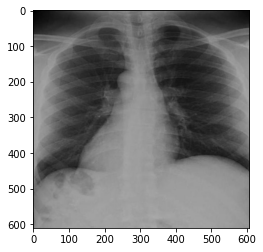

In [ ]:
# loading the image and displaying it
img = cv2.imread('xray.jpg')  # reads image in BGR format

plt.imshow(img)

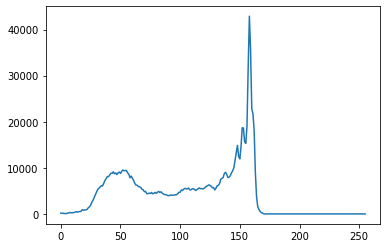

In [ ]:
# 1 - Calculating the image's normalized intensity histogram 𝑝𝑟(𝑟𝑘)

# Find the frequency of the pixels in range 0 to 255 - the image is grayscale.
hist_graph, bins = np.histogram(img, 256, [0, 256])

# displaying resultant histogram equalization graph
plt.plot(hist_graph)

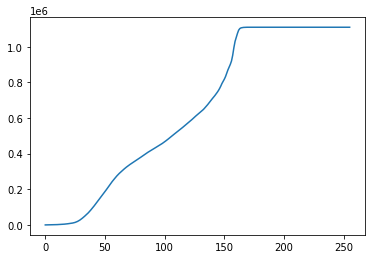

In [ ]:
# 2 - Calculating the cumulative distributive function of the above histogram.

# using numpy function, numpy.cumsum to calculate CDF
cdf = hist_graph.cumsum()

# displaying cdf plot
plt.plot(cdf)

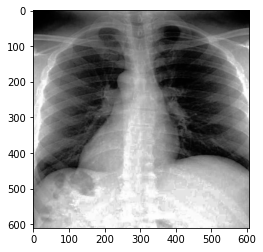

In [ ]:
from numpy.ma.core import diff
# 3 - Applying intensity transformation to get histogram equalized output of input image

# masking cdf and applying equalizing function
cdfMasked = np.ma.masked_equal(cdf, 0)
cdfDiff = cdfMasked.max() - cdfMasked.min()
# L = 256, so L-1 = 255
cdfMasked = (cdfMasked - cdfMasked.min()) * (255) / cdfDiff
equalizeFunction = np.ma.filled(cdfMasked, 0).astype('uint8')
hist_equal = equalizeFunction[img]

# displaying histogram equalized result of original input image
plt.imshow(hist_equal)

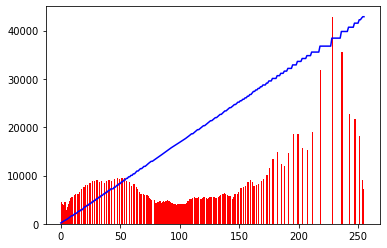

In [ ]:
# Equalize the image

# 4 - Calculating the normalized intensity histogram of the previous output image
equalizedHist, bins = np.histogram(hist_equal, 256, [0, 256])
equalizedCdf = equalizedHist.cumsum()

# displaying the result graph - adding flatten() since hist() must have a dimension of 2 or lesser
plt.hist(hist_equal.flatten(), 256, [0, 256], color='r')
plt.plot(equalizedCdf * equalizedHist.max() / equalizedCdf.max(), color='b')